In [1]:
const N = 60 # 繰り返し回数
const α = 2.5 # 極限値
const C = 1000.0
const rate = 0.9
a = [α + C * (rate^n) / sqrt(n+1) for n in 1:N]

60-element Vector{Float64}:
 638.8961030678927
 470.1537180435969
 367.00000000000006
 295.9168400075224
 243.56653303600655
 203.36581750049672
 171.60349070525203
 145.98907000000003
 125.01311574562095
 107.63050529982824
   ⋮
   3.0734196298432335
   3.0112768400311056
   2.9559467926062686
   2.9066717509903213
   2.862779803111694
   2.823674913983463
   2.788828165391585
   2.7577700357234
   2.730083592008322

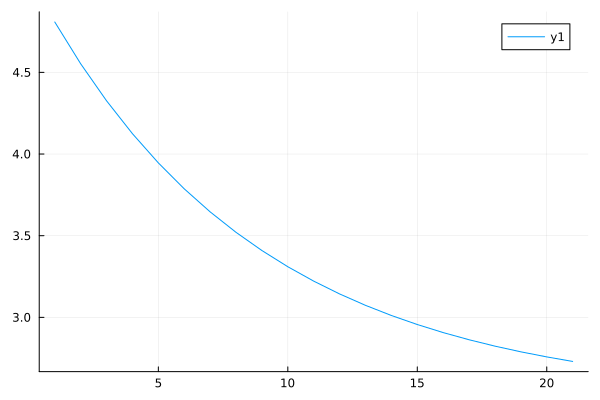

In [4]:
#=
最後から20個の要素をプロットする
=#
using Plots
plot(a[end - 20: end])

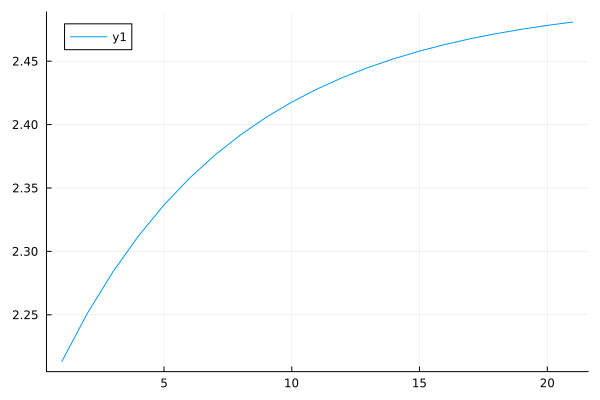

In [6]:
""" Richardson 加速 """
function rcs(r, x, n)
    return (x[n+1]-r*x[n])/(1.0-r)
end

b = [rcs(rate, a, n) for n in 1:N-1]
plot(b[end - 20: end])

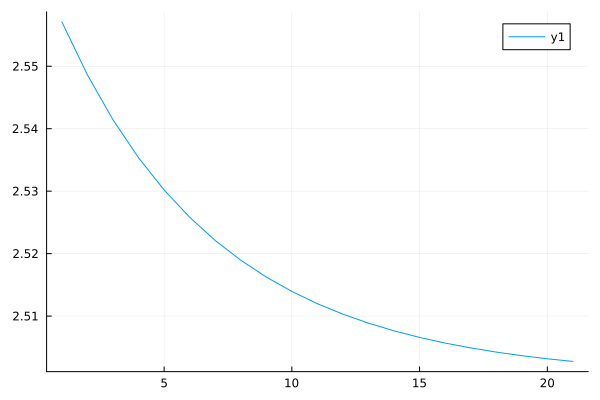

In [8]:
# Aitken 加速
function aitken(x,n)
    return x[n] - ((x[n+1]-x[n])^2 / (x[n+2] - 2*x[n+1] + x[n]))
end

c = [aitken(a,n) for n in 1:N-2]

plot(c[end-20:end])

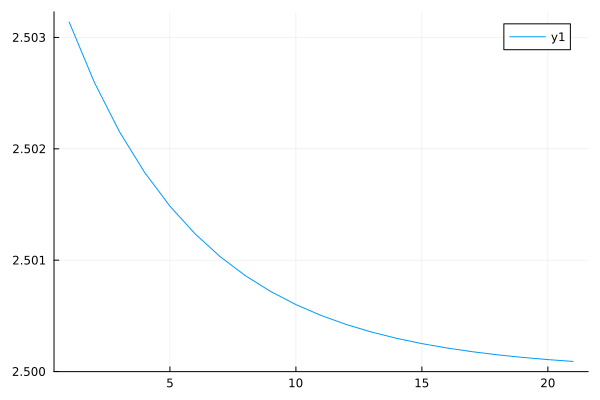

In [10]:
d = [aitken(c,n) for n in 1:N-4]

plot(d[end-20:end])